In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [60]:
df = pd.read_csv('./df_p2.csv')
df.shape

(75, 16)

In [61]:
df.head()

,Test Bench Mark,Test Parameter,L1-D SIZE,L1-I SIZE,L2 SIZE,L1-D Associativity,L1-I Associativity,L2 Associativity,BLOCK SIZE,L1-D MISS RATE,L1-I MISS RATE,L2-MISS RATE,L1-D MISSES,L1-I MISSES,L2-MISSES,#INSTRUCTIONS
0,401.bzip,L2 SIZE,1kB,1kB,1kB,1,1,1,16,0.076852,0.009128,0.717978,538843,117887,471518,10000001
1,401.bzip,L2 SIZE,1kB,1kB,2kB,1,1,1,16,0.076852,0.009128,0.629505,538843,117887,413415,10000001
2,401.bzip,L2 SIZE,1kB,1kB,4kB,1,1,1,16,0.076852,0.009128,0.594427,538843,117887,390378,10000001
3,401.bzip,L2 SIZE,1kB,1kB,8kB,1,1,1,16,0.076852,0.009128,0.579325,538843,117887,380460,10000001
4,401.bzip,L2 SIZE,1kB,1kB,16kB,1,1,1,16,0.076852,0.009128,0.565855,538843,117887,371614,10000001


In [62]:
df.index

RangeIndex(start=0, stop=75, step=1)

In [63]:
df.columns

Index(['Test Bench Mark', 'Test Parameter', 'L1-D SIZE', 'L1-I SIZE',
       'L2 SIZE', 'L1-D Associativity', 'L1-I Associativity',
       'L2 Associativity', 'BLOCK SIZE', 'L1-D MISS RATE', 'L1-I MISS RATE',
       'L2-MISS RATE', 'L1-D MISSES', 'L1-I MISSES', 'L2-MISSES',
       '#INSTRUCTIONS'],
      dtype='object')

In [66]:
df['L1-I SIZE'] = df['L1-I SIZE'].str[:-2].astype(int)
df['L2 SIZE'] = df['L2 SIZE'].str[:-2].astype(int)
df['Test Parameter'] = df['Test Parameter'].replace('L2  Associativity', 'L2 Associativity')
df.head()

,Test Bench Mark,Test Parameter,L1-D SIZE,L1-I SIZE,L2 SIZE,L1-D Associativity,L1-I Associativity,L2 Associativity,BLOCK SIZE,L1-D MISS RATE,L1-I MISS RATE,L2-MISS RATE,L1-D MISSES,L1-I MISSES,L2-MISSES,#INSTRUCTIONS
0,401.bzip,L2 SIZE,1kB,1,1,1,1,1,16,0.076852,0.009128,0.717978,538843,117887,471518,10000001
1,401.bzip,L2 SIZE,1kB,1,2,1,1,1,16,0.076852,0.009128,0.629505,538843,117887,413415,10000001
2,401.bzip,L2 SIZE,1kB,1,4,1,1,1,16,0.076852,0.009128,0.594427,538843,117887,390378,10000001
3,401.bzip,L2 SIZE,1kB,1,8,1,1,1,16,0.076852,0.009128,0.579325,538843,117887,380460,10000001
4,401.bzip,L2 SIZE,1kB,1,16,1,1,1,16,0.076852,0.009128,0.565855,538843,117887,371614,10000001


In [67]:
df['L1-D HIT-RATE'] = 1 - df['L1-D MISS RATE']
df['L1-I HIT-RATE'] = 1 - df['L1-I MISS RATE']
df['L2 HIT-RATE'] = 1 - df['L2-MISS RATE']

In [68]:
df['CPI'] = 1 + ((( (df['L1-I MISSES'] + df['L1-D MISSES']) * 6) + (df['L2-MISSES'] * 50))/ df['#INSTRUCTIONS'])

In [69]:
df

,Test Bench Mark,Test Parameter,L1-D SIZE,L1-I SIZE,L2 SIZE,L1-D Associativity,L1-I Associativity,L2 Associativity,BLOCK SIZE,L1-D MISS RATE,L1-I MISS RATE,L2-MISS RATE,L1-D MISSES,L1-I MISSES,L2-MISSES,#INSTRUCTIONS,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,L2 SIZE,1kB,1,1,1,1,1,16,0.076852,0.009128,0.717978,538843,117887,471518,10000001,0.923148,0.990872,0.282022,3.751628
1,401.bzip,L2 SIZE,1kB,1,2,1,1,1,16,0.076852,0.009128,0.629505,538843,117887,413415,10000001,0.923148,0.990872,0.370495,3.461113
2,401.bzip,L2 SIZE,1kB,1,4,1,1,1,16,0.076852,0.009128,0.594427,538843,117887,390378,10000001,0.923148,0.990872,0.405573,3.345928
3,401.bzip,L2 SIZE,1kB,1,8,1,1,1,16,0.076852,0.009128,0.579325,538843,117887,380460,10000001,0.923148,0.990872,0.420675,3.296338
4,401.bzip,L2 SIZE,1kB,1,16,1,1,1,16,0.076852,0.009128,0.565855,538843,117887,371614,10000001,0.923148,0.990872,0.434145,3.252108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,458.sjeng,BLOCK SIZE,1kB,1,1,1,1,1,32,0.218447,0.000070,0.971022,1693133,956,1644998,10000000,0.781553,0.999930,0.028978,10.241443
71,458.sjeng,BLOCK SIZE,1kB,1,1,1,1,1,64,0.130736,0.000047,0.916804,1013300,644,929588,10000000,0.869264,0.999953,0.083196,6.256306
72,458.sjeng,BLOCK SIZE,1kB,1,1,1,1,1,128,0.097583,0.000035,0.848600,756339,484,642240,10000000,0.902417,0.999965,0.151400,4.665294
73,458.sjeng,BLOCK SIZE,1kB,1,1,1,1,1,256,0.098933,0.000027,0.799070,766809,372,613031,10000000,0.901067,0.999973,0.200930,4.525464


In [70]:
df['#INSTRUCTIONS'].unique()

array([10000001, 10000000])

In [71]:
df.to_csv('./CA_P2_df.csv')

# L1-I SIZE

## 'L1-I SIZE', L1-I HIT-RATE

In [72]:
bench_mark = '401.bzip'
test_param = 'L1-I SIZE'
ouput1 = 'L1-I HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I SIZE,L1-I HIT-RATE
0,L1-I SIZE,2,0.999569
1,L1-I SIZE,4,0.999687
2,L1-I SIZE,8,0.999704
3,L1-I SIZE,16,0.999863
4,L1-I SIZE,32,0.999880


<Figure size 200x100 with 0 Axes>

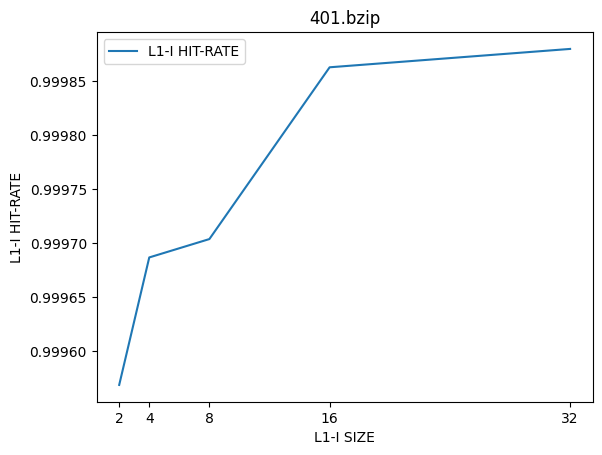

In [73]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])
plt.title(bench_mark)
plt.show()

In [74]:
bench_mark = '429.mcf'
test_param = 'L1-I SIZE'
ouput1 = 'L1-I HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I SIZE,L1-I HIT-RATE
0,L1-I SIZE,2,0.804057
1,L1-I SIZE,4,0.884328
2,L1-I SIZE,8,0.933859
3,L1-I SIZE,16,0.968880
4,L1-I SIZE,32,0.973083


<Figure size 200x100 with 0 Axes>

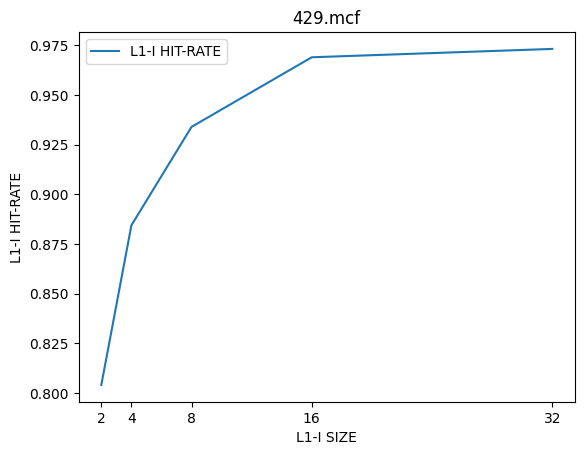

In [75]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])
plt.title(bench_mark)
plt.show()

In [76]:
bench_mark = '458.sjeng'
test_param ='L1-I SIZE'
ouput1 = 'L1-I HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I SIZE,L1-I HIT-RATE
0,L1-I SIZE,2,0.999894
1,L1-I SIZE,4,0.999901
2,L1-I SIZE,8,0.999905
3,L1-I SIZE,16,0.999916
4,L1-I SIZE,32,0.999917


<Figure size 200x100 with 0 Axes>

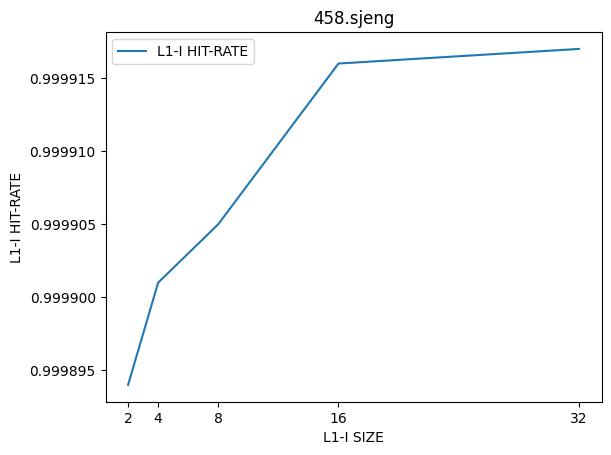

In [77]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])
plt.title(bench_mark)
plt.show()

In [78]:
test_param ='L1-I SIZE'
ouput1 = 'L1-I HIT-RATE'
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I SIZE,L1-I HIT-RATE
0,401.bzip,2,0.999569
1,401.bzip,4,0.999687
2,401.bzip,8,0.999704
3,401.bzip,16,0.999863
4,401.bzip,32,0.999880
5,429.mcf,2,0.804057
6,429.mcf,4,0.884328
7,429.mcf,8,0.933859
8,429.mcf,16,0.968880
9,429.mcf,32,0.973083


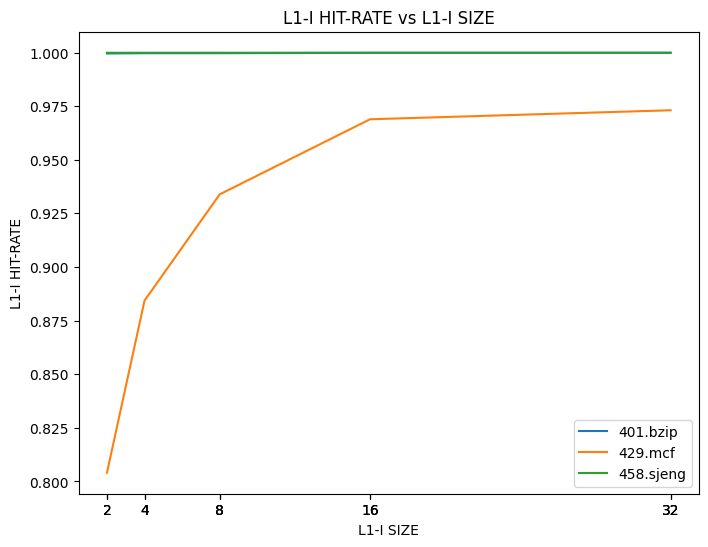

In [79]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

## 'L1-I SIZE', CPI

In [80]:
bench_mark = '401.bzip'
test_param = 'L1-I SIZE'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I SIZE,CPI
0,L1-I SIZE,2,3.662722
1,L1-I SIZE,4,3.654771
2,L1-I SIZE,8,3.653862
3,L1-I SIZE,16,3.643098
4,L1-I SIZE,32,3.642132


<Figure size 200x100 with 0 Axes>

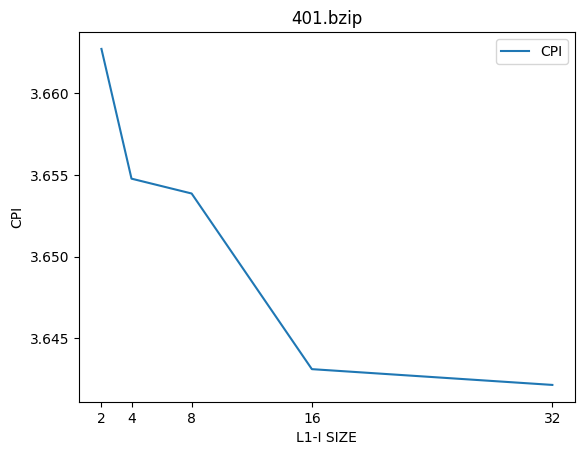

In [81]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])
plt.title(bench_mark)
plt.show()

In [82]:
bench_mark = '429.mcf'
test_param = 'L1-I SIZE'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I SIZE,CPI
0,L1-I SIZE,2,16.733786
1,L1-I SIZE,4,10.968484
2,L1-I SIZE,8,7.712629
3,L1-I SIZE,16,5.387728
4,L1-I SIZE,32,4.881616


<Figure size 200x100 with 0 Axes>

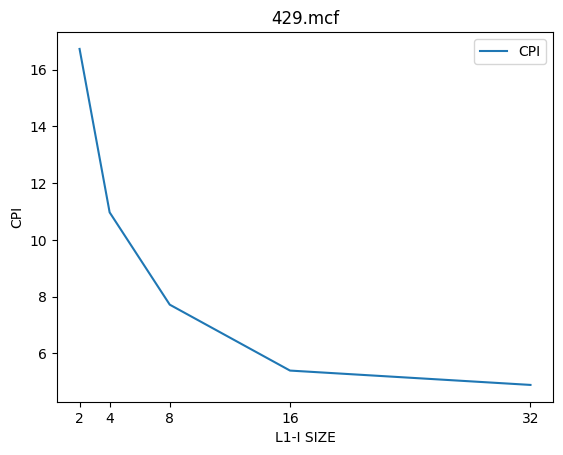

In [83]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])
plt.title(bench_mark)
plt.show()

In [84]:
bench_mark = '458.sjeng'
test_param = 'L1-I SIZE'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I SIZE,CPI
0,L1-I SIZE,2,18.857287
1,L1-I SIZE,4,18.856703
2,L1-I SIZE,8,18.856490
3,L1-I SIZE,16,18.856114
4,L1-I SIZE,32,18.856057


<Figure size 200x100 with 0 Axes>

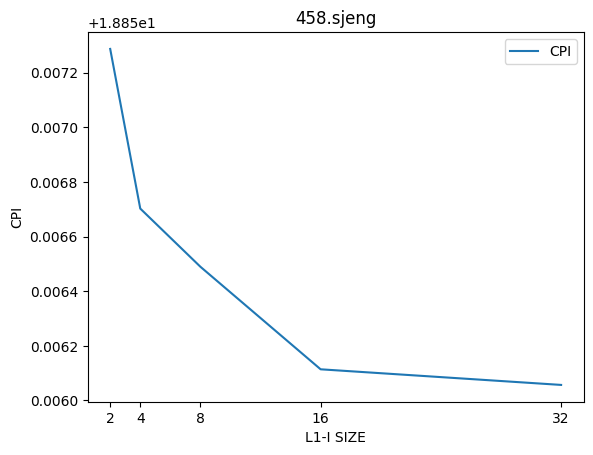

In [85]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])

plt.title(bench_mark)
plt.show()

In [86]:
test_param ='L1-I SIZE'
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I SIZE,CPI
0,401.bzip,2,3.662722
1,401.bzip,4,3.654771
2,401.bzip,8,3.653862
3,401.bzip,16,3.643098
4,401.bzip,32,3.642132
5,429.mcf,2,16.733786
6,429.mcf,4,10.968484
7,429.mcf,8,7.712629
8,429.mcf,16,5.387728
9,429.mcf,32,4.881616


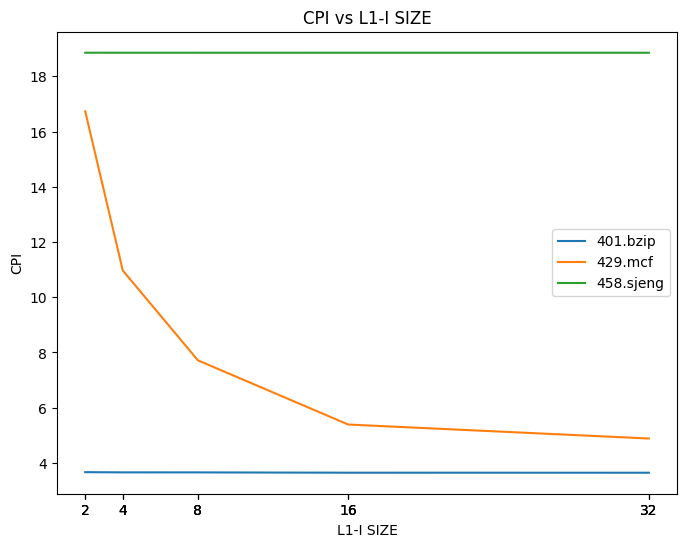

In [87]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

# 'L1-I Associativity', L1-I HIT-RATE

In [88]:
bench_mark = '401.bzip'
test_param = 'L1-I Associativity'
ouput1 = 'L1-I HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I Associativity,L1-I HIT-RATE
0,L1-I Associativity,2,0.999294
1,L1-I Associativity,4,0.999441
2,L1-I Associativity,8,0.999437
3,L1-I Associativity,16,0.999455
4,L1-I Associativity,32,0.999442


<Figure size 200x100 with 0 Axes>

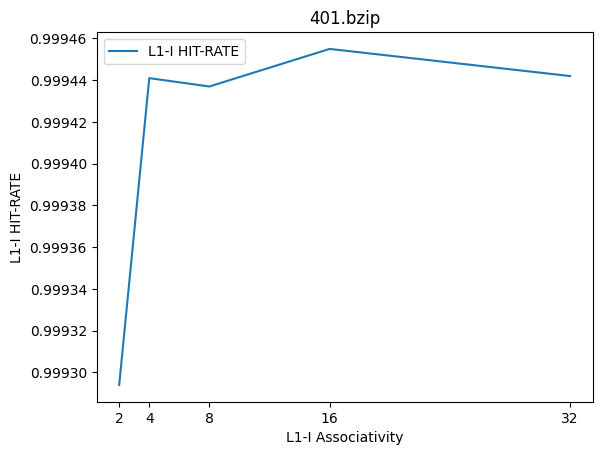

In [89]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])
plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [90]:
bench_mark = '429.mcf'
test_param = 'L1-I Associativity'
ouput1 = 'L1-I HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I Associativity,L1-I HIT-RATE
0,L1-I Associativity,2,0.805386
1,L1-I Associativity,4,0.803242
2,L1-I Associativity,8,0.804178
3,L1-I Associativity,16,0.804550
4,L1-I Associativity,32,0.804551


<Figure size 200x100 with 0 Axes>

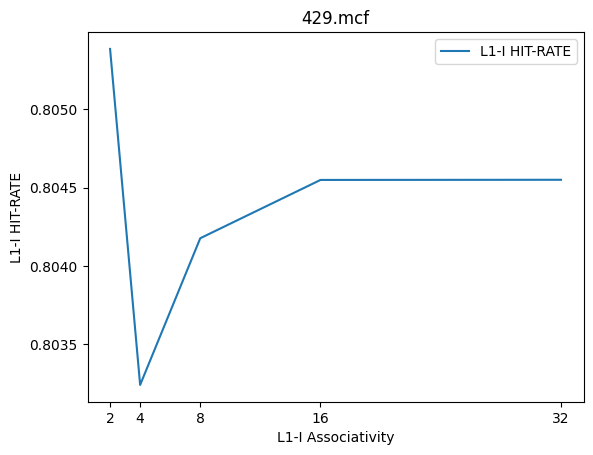

In [91]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])
plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [92]:
bench_mark = '458.sjeng'
test_param = 'L1-I Associativity'
ouput1 = 'L1-I HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I Associativity,L1-I HIT-RATE
0,L1-I Associativity,2,0.999888
1,L1-I Associativity,4,0.999893
2,L1-I Associativity,8,0.999888
3,L1-I Associativity,16,0.999887
4,L1-I Associativity,32,0.999887


<Figure size 200x100 with 0 Axes>

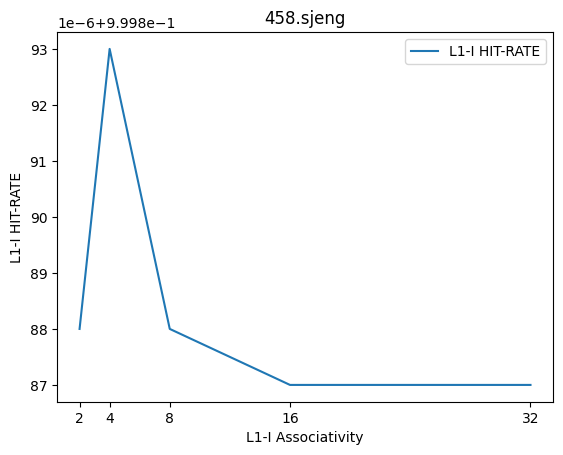

In [93]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])
plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [94]:
test_param ='L1-I SIZE'
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I SIZE,L1-I HIT-RATE
0,401.bzip,2,0.999569
1,401.bzip,4,0.999687
2,401.bzip,8,0.999704
3,401.bzip,16,0.999863
4,401.bzip,32,0.999880
5,429.mcf,2,0.804057
6,429.mcf,4,0.884328
7,429.mcf,8,0.933859
8,429.mcf,16,0.968880
9,429.mcf,32,0.973083


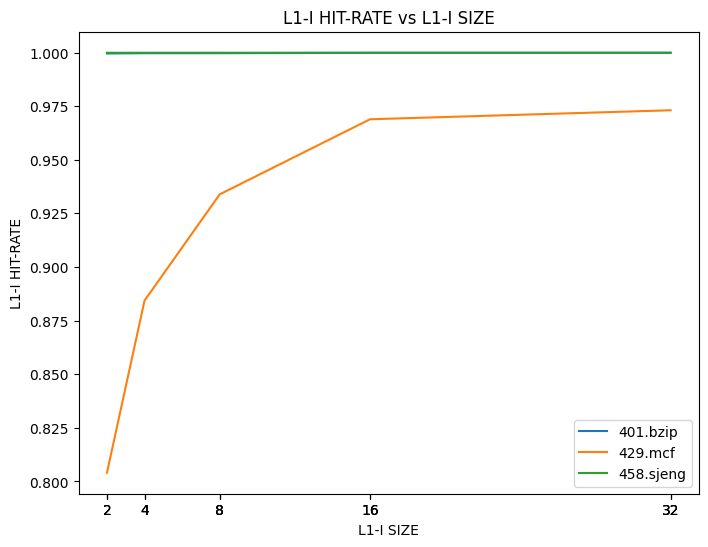

In [95]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

# 'L1-I Associativity', CPI

In [96]:
bench_mark = '401.bzip'
test_param = 'L1-I Associativity'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I Associativity,CPI
0,L1-I Associativity,2,3.671539
1,L1-I Associativity,4,3.669650
2,L1-I Associativity,8,3.669688
3,L1-I Associativity,16,3.669712
4,L1-I Associativity,32,3.669797


<Figure size 200x100 with 0 Axes>

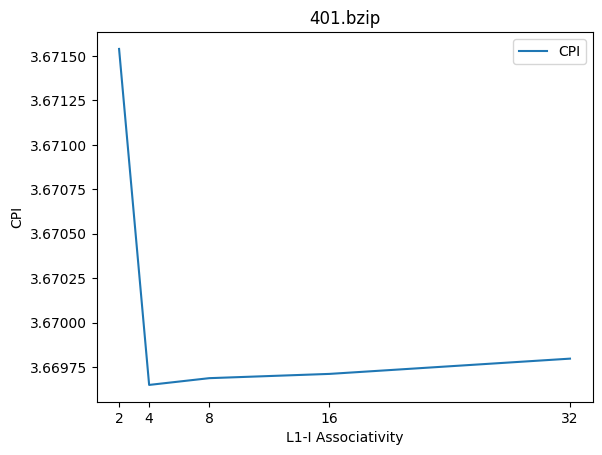

In [97]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])
plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [98]:
bench_mark = '429.mcf'
test_param = 'L1-I Associativity'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I Associativity,CPI
0,L1-I Associativity,2,18.004016
1,L1-I Associativity,4,18.816263
2,L1-I Associativity,8,19.155318
3,L1-I Associativity,16,19.289519
4,L1-I Associativity,32,19.359263


<Figure size 200x100 with 0 Axes>

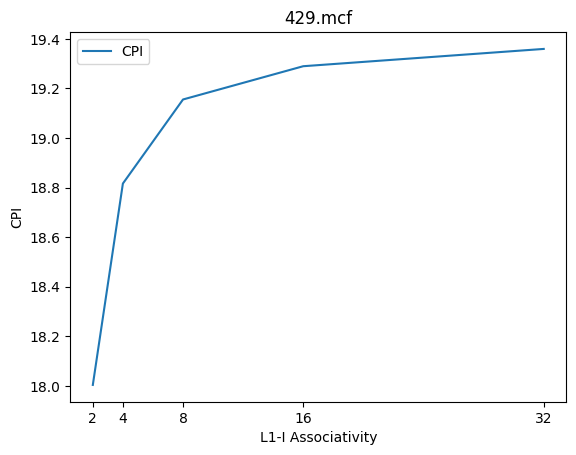

In [99]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])
plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [100]:
bench_mark = '458.sjeng'
test_param = 'L1-I Associativity'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L1-I Associativity,CPI
0,L1-I Associativity,2,18.857887
1,L1-I Associativity,4,18.857581
2,L1-I Associativity,8,18.857520
3,L1-I Associativity,16,18.857505
4,L1-I Associativity,32,18.857535


<Figure size 200x100 with 0 Axes>

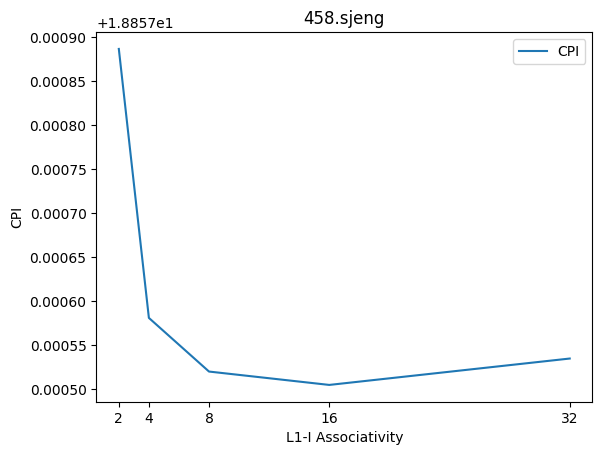

In [101]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])
plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [102]:
test_param = 'L1-I Associativity'
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I Associativity,CPI
0,401.bzip,2,3.671539
1,401.bzip,4,3.669650
2,401.bzip,8,3.669688
3,401.bzip,16,3.669712
4,401.bzip,32,3.669797
5,429.mcf,2,18.004016
6,429.mcf,4,18.816263
7,429.mcf,8,19.155318
8,429.mcf,16,19.289519
9,429.mcf,32,19.359263


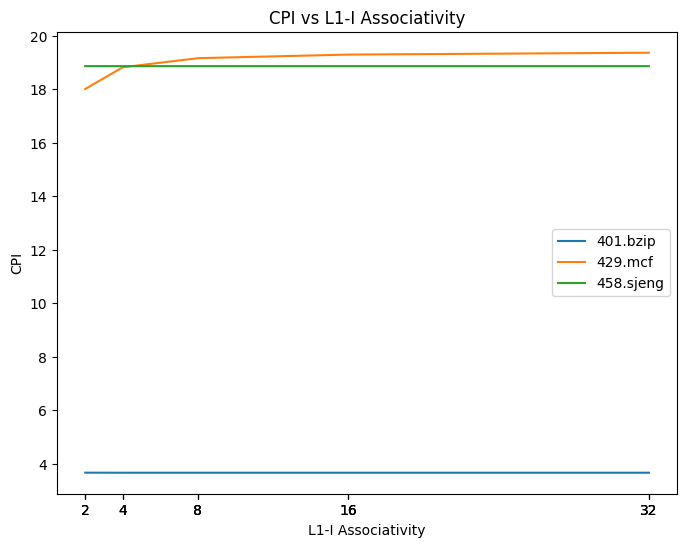

In [103]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

# 'L2 SIZE', L2 HIT-RATE

In [104]:
bench_mark = '401.bzip'
test_param = 'L2 SIZE'
ouput1 = 'L2 HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 SIZE,L2 HIT-RATE
0,L2 SIZE,1,0.282022
1,L2 SIZE,2,0.370495
2,L2 SIZE,4,0.405573
3,L2 SIZE,8,0.420675
4,L2 SIZE,16,0.434145


<Figure size 200x100 with 0 Axes>

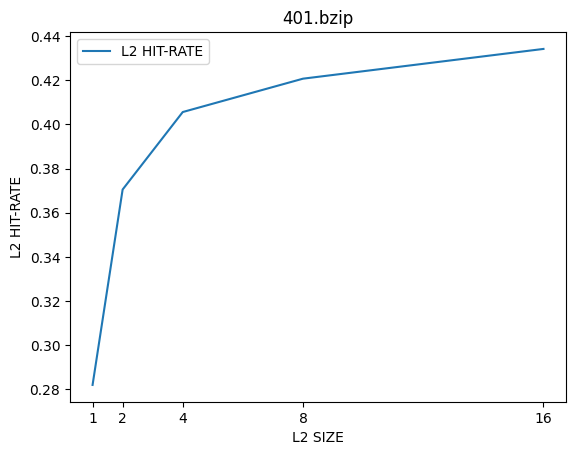

In [105]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])
plt.title(bench_mark)
plt.show()

In [106]:
bench_mark = '429.mcf'
test_param = 'L2 SIZE'
ouput1 = 'L2 HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 SIZE,L2 HIT-RATE
0,L2 SIZE,1,0.185042
1,L2 SIZE,2,0.223695
2,L2 SIZE,4,0.410752
3,L2 SIZE,8,0.655854
4,L2 SIZE,16,0.818610


<Figure size 200x100 with 0 Axes>

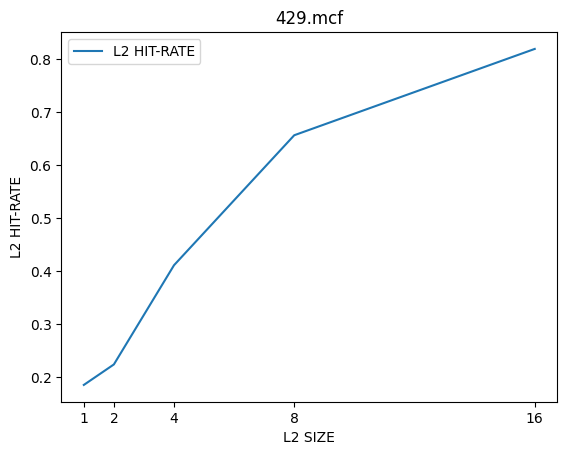

In [108]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])

plt.title(bench_mark)
plt.show()

In [109]:
bench_mark = '458.sjeng'
test_param = 'L2 SIZE'
ouput1 = 'L2 HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 SIZE,L2 HIT-RATE
0,L2 SIZE,1,0.008657
1,L2 SIZE,2,0.012377
2,L2 SIZE,4,0.018923
3,L2 SIZE,8,0.021802
4,L2 SIZE,16,0.022640


<Figure size 200x100 with 0 Axes>

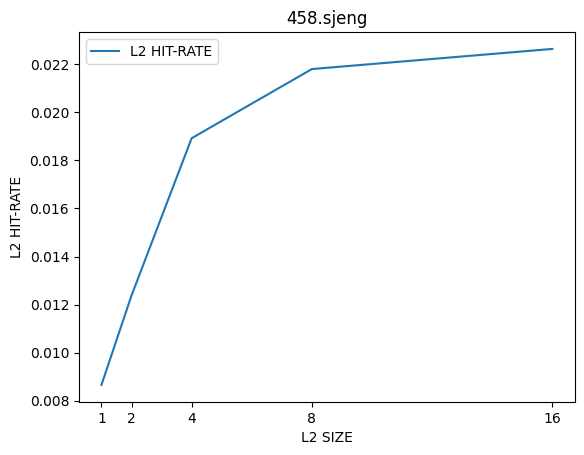

In [110]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])
plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [111]:
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 SIZE,L2 HIT-RATE
0,401.bzip,1,0.282022
1,401.bzip,2,0.370495
2,401.bzip,4,0.405573
3,401.bzip,8,0.420675
4,401.bzip,16,0.434145
5,429.mcf,1,0.185042
6,429.mcf,2,0.223695
7,429.mcf,4,0.410752
8,429.mcf,8,0.655854
9,429.mcf,16,0.818610


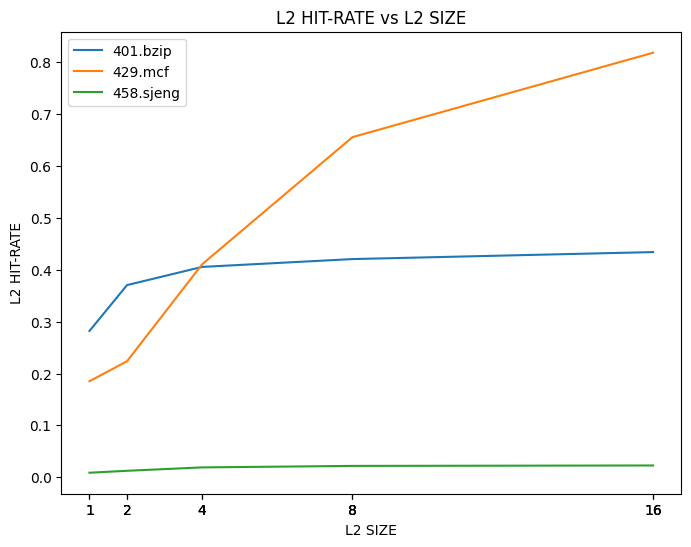

In [112]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

# 'L2 SIZE', CPI

In [113]:
bench_mark = '401.bzip'
test_param = 'L2 SIZE'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 SIZE,CPI
0,L2 SIZE,1,3.751628
1,L2 SIZE,2,3.461113
2,L2 SIZE,4,3.345928
3,L2 SIZE,8,3.296338
4,L2 SIZE,16,3.252108


<Figure size 200x100 with 0 Axes>

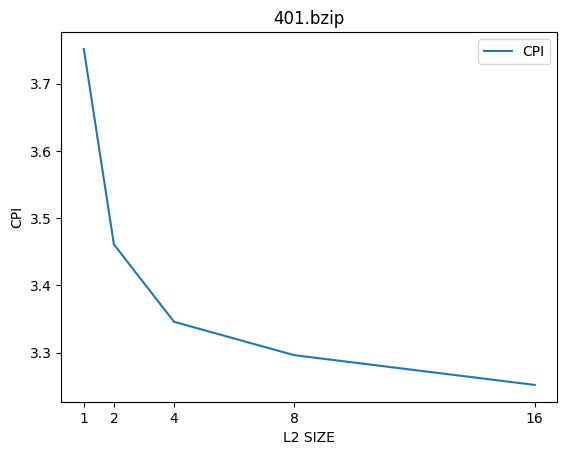

In [114]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [115]:
bench_mark = '429.mcf'
test_param = 'L2 SIZE'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 SIZE,CPI
0,L2 SIZE,1,18.189424
1,L2 SIZE,2,17.478784
2,L2 SIZE,4,14.039689
3,L2 SIZE,8,9.533439
4,L2 SIZE,16,6.541124


<Figure size 200x100 with 0 Axes>

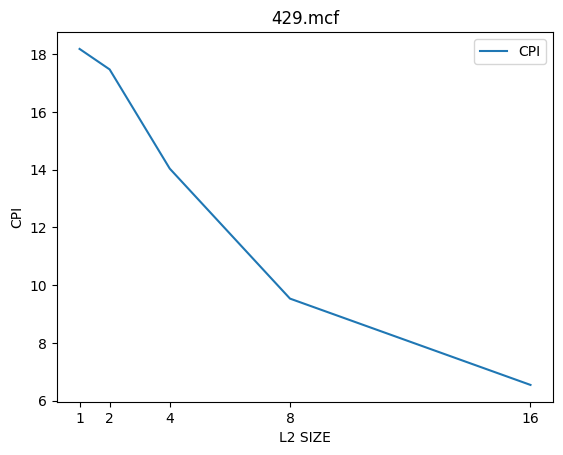

In [116]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [117]:
bench_mark = '458.sjeng'
test_param = 'L2 SIZE'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 SIZE,CPI
0,L2 SIZE,1,18.857799
1,L2 SIZE,2,18.798014
2,L2 SIZE,4,18.692824
3,L2 SIZE,8,18.646574
4,L2 SIZE,16,18.633109


<Figure size 200x100 with 0 Axes>

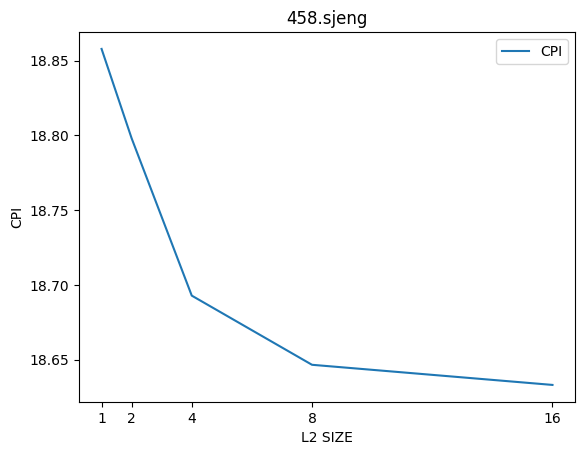

In [118]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [119]:
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 SIZE,CPI
0,401.bzip,1,3.751628
1,401.bzip,2,3.461113
2,401.bzip,4,3.345928
3,401.bzip,8,3.296338
4,401.bzip,16,3.252108
5,429.mcf,1,18.189424
6,429.mcf,2,17.478784
7,429.mcf,4,14.039689
8,429.mcf,8,9.533439
9,429.mcf,16,6.541124


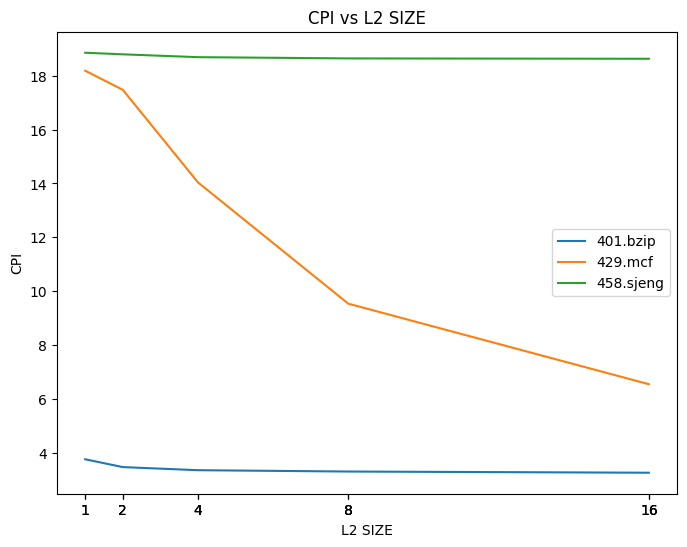

In [120]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

# 'L2 Associativity', L2 HIT-RATE

In [121]:
bench_mark = '401.bzip'
test_param = 'L2 Associativity'
ouput1 = 'L2 HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 Associativity,L2 HIT-RATE
0,L2 Associativity,2,0.335694
1,L2 Associativity,4,0.348833
2,L2 Associativity,8,0.352732
3,L2 Associativity,16,0.354133
4,L2 Associativity,32,0.354689


<Figure size 200x100 with 0 Axes>

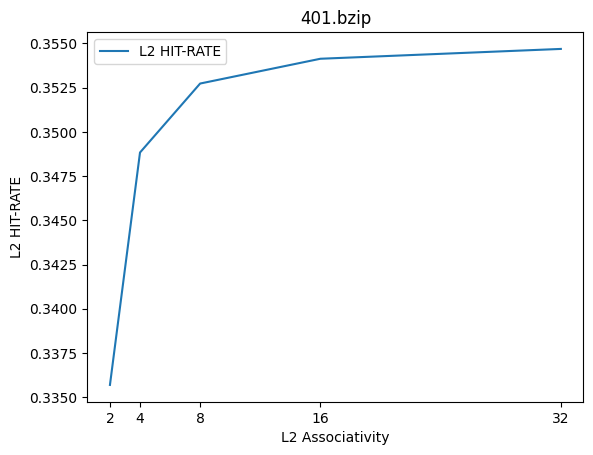

In [122]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [123]:
bench_mark = '429.mcf'
test_param = 'L2 Associativity'
ouput1 = 'L2 HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 Associativity,L2 HIT-RATE
0,L2 Associativity,2,0.135381
1,L2 Associativity,4,0.134086
2,L2 Associativity,8,0.135459
3,L2 Associativity,16,0.136976
4,L2 Associativity,32,0.134894


<Figure size 200x100 with 0 Axes>

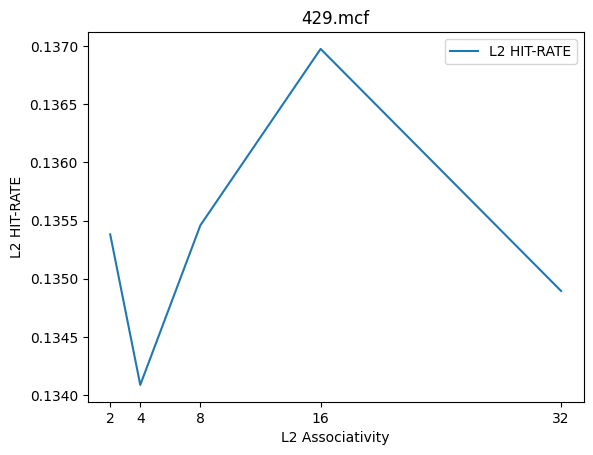

In [124]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [125]:
bench_mark = '458.sjeng'
test_param = 'L2 Associativity'
ouput1 = 'L2 HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 Associativity,L2 HIT-RATE
0,L2 Associativity,2,0.018507
1,L2 Associativity,4,0.019108
2,L2 Associativity,8,0.019395
3,L2 Associativity,16,0.019385
4,L2 Associativity,32,0.019406


<Figure size 200x100 with 0 Axes>

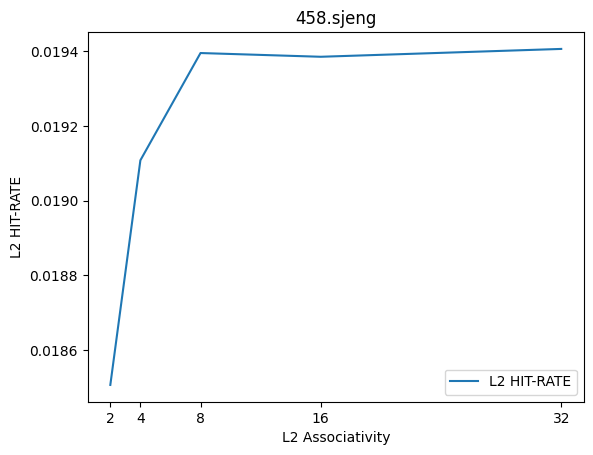

In [126]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [127]:
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 Associativity,L2 HIT-RATE
0,401.bzip,2,0.335694
1,401.bzip,4,0.348833
2,401.bzip,8,0.352732
3,401.bzip,16,0.354133
4,401.bzip,32,0.354689
5,429.mcf,2,0.135381
6,429.mcf,4,0.134086
7,429.mcf,8,0.135459
8,429.mcf,16,0.136976
9,429.mcf,32,0.134894


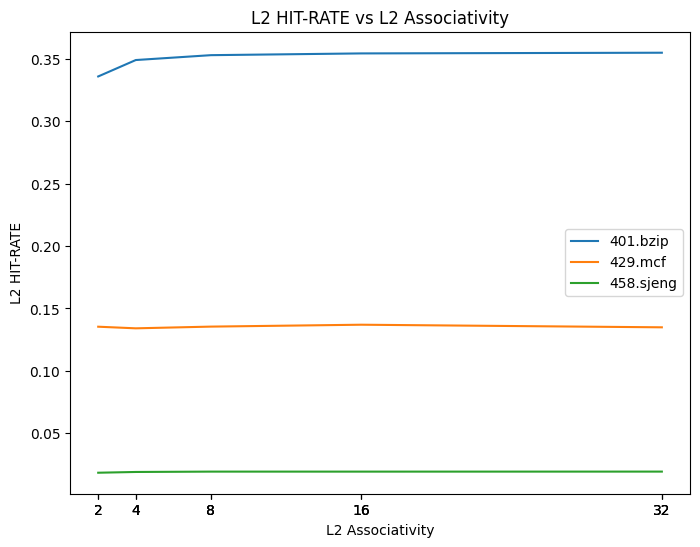

In [128]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

# 'L2 Associativity', CPI

In [129]:
bench_mark = '401.bzip'
test_param = 'L2 Associativity'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 Associativity,CPI
0,L2 Associativity,2,3.575388
1,L2 Associativity,4,3.532243
2,L2 Associativity,8,3.519438
3,L2 Associativity,16,3.514838
4,L2 Associativity,32,3.513013


<Figure size 200x100 with 0 Axes>

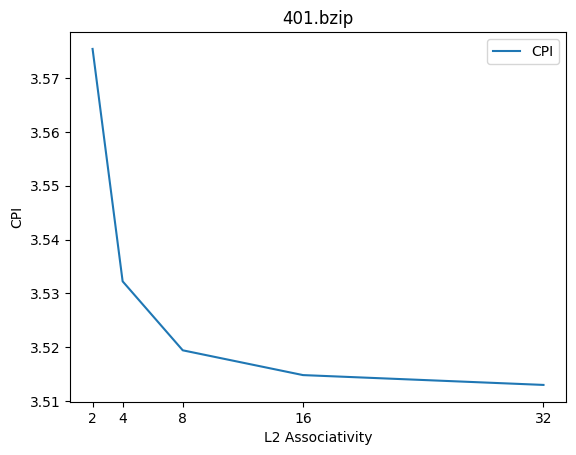

In [130]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])

plt.title(bench_mark)
plt.show()

In [131]:
bench_mark = '429.mcf'
test_param = 'L2 Associativity'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 Associativity,CPI
0,L2 Associativity,2,19.102449
1,L2 Associativity,4,19.126274
2,L2 Associativity,8,19.101014
3,L2 Associativity,16,19.073134
4,L2 Associativity,32,19.111419


<Figure size 200x100 with 0 Axes>

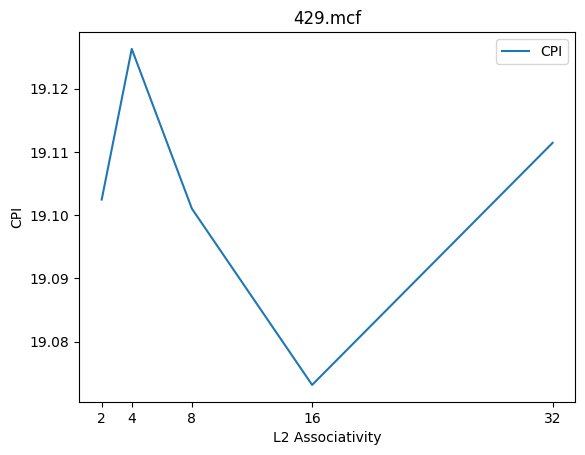

In [132]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])

plt.title(bench_mark)
plt.show()

In [133]:
bench_mark = '458.sjeng'
test_param = 'L2 Associativity'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,L2 Associativity,CPI
0,L2 Associativity,2,18.699524
1,L2 Associativity,4,18.689854
2,L2 Associativity,8,18.685244
3,L2 Associativity,16,18.685409
4,L2 Associativity,32,18.685069


<Figure size 200x100 with 0 Axes>

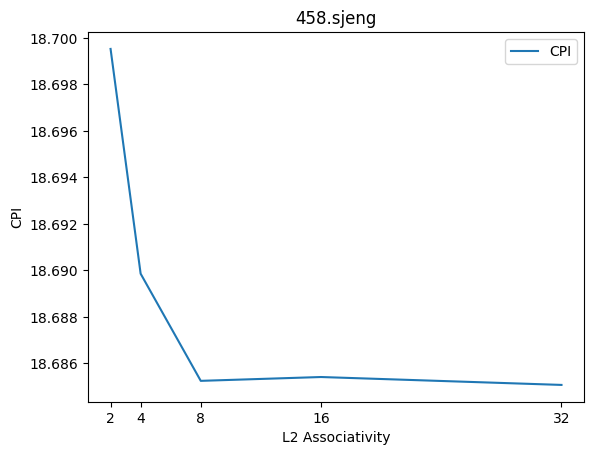

In [134]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [135]:
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 Associativity,CPI
0,401.bzip,2,3.575388
1,401.bzip,4,3.532243
2,401.bzip,8,3.519438
3,401.bzip,16,3.514838
4,401.bzip,32,3.513013
5,429.mcf,2,19.102449
6,429.mcf,4,19.126274
7,429.mcf,8,19.101014
8,429.mcf,16,19.073134
9,429.mcf,32,19.111419


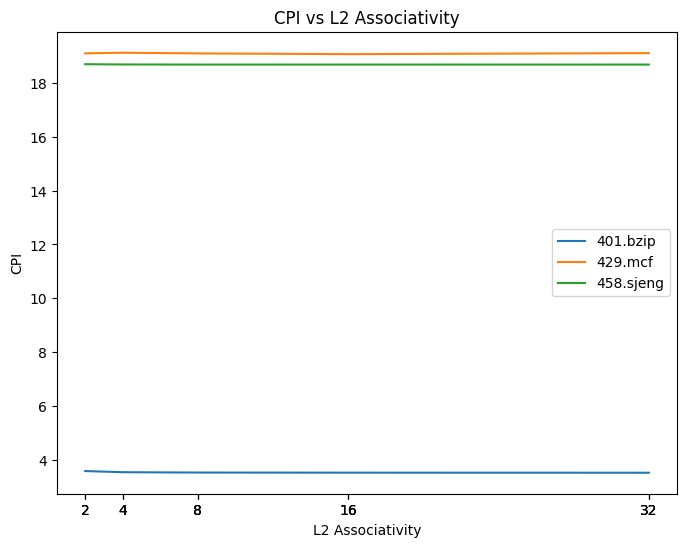

In [136]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

# 'BLOCK SIZE', L1-I HIT-RATE

In [137]:
bench_mark = '401.bzip'
test_param = 'BLOCK SIZE'
ouput1 = 'L1-I HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,L1-I HIT-RATE
0,BLOCK SIZE,32,0.994882
1,BLOCK SIZE,64,0.996895
2,BLOCK SIZE,128,0.996998
3,BLOCK SIZE,256,0.997997
4,BLOCK SIZE,512,0.998012


<Figure size 200x100 with 0 Axes>

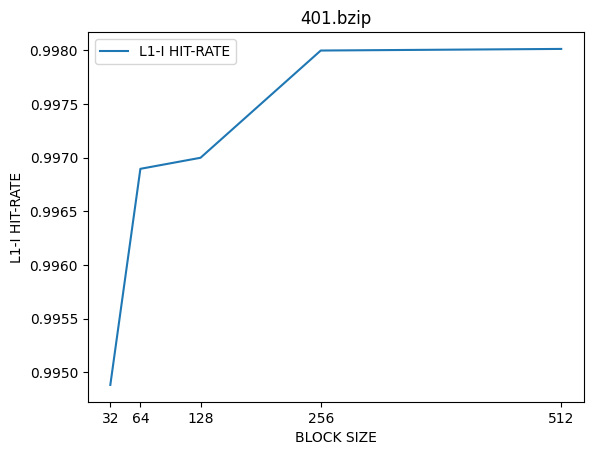

In [139]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [140]:
bench_mark = '429.mcf'
test_param = 'BLOCK SIZE'
ouput1 = 'L1-I HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,L1-I HIT-RATE
0,BLOCK SIZE,32,0.877652
1,BLOCK SIZE,64,0.918875
2,BLOCK SIZE,128,0.944083
3,BLOCK SIZE,256,0.955089
4,BLOCK SIZE,512,0.965516


<Figure size 200x100 with 0 Axes>

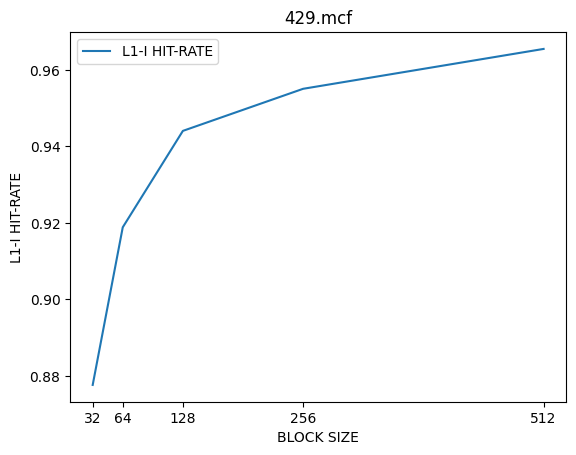

In [141]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])

plt.title(bench_mark)
plt.show()

In [142]:
bench_mark = '458.sjeng'
test_param = 'BLOCK SIZE'
ouput1 = 'L1-I HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,L1-I HIT-RATE
0,BLOCK SIZE,32,0.999930
1,BLOCK SIZE,64,0.999953
2,BLOCK SIZE,128,0.999965
3,BLOCK SIZE,256,0.999973
4,BLOCK SIZE,512,0.999974


<Figure size 200x100 with 0 Axes>

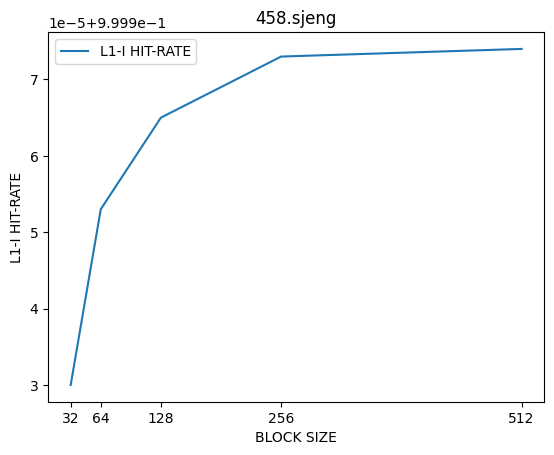

In [143]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.ylabel(ouput1)
plt.xticks(res[test_param])

plt.title(bench_mark)
plt.show()

In [144]:
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,BLOCK SIZE,L1-I HIT-RATE
0,401.bzip,32,0.994882
1,401.bzip,64,0.996895
2,401.bzip,128,0.996998
3,401.bzip,256,0.997997
4,401.bzip,512,0.998012
5,429.mcf,32,0.877652
6,429.mcf,64,0.918875
7,429.mcf,128,0.944083
8,429.mcf,256,0.955089
9,429.mcf,512,0.965516


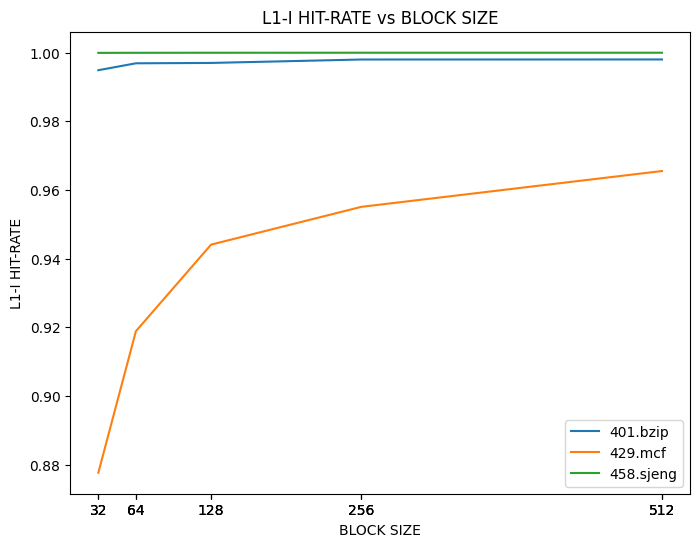

In [145]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

# 'BLOCK SIZE', L2 HIT-RATE

In [146]:
bench_mark = '401.bzip'
test_param = 'BLOCK SIZE'
ouput1 = 'L2 HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,L2 HIT-RATE
0,BLOCK SIZE,32,0.335016
1,BLOCK SIZE,64,0.727185
2,BLOCK SIZE,128,0.672193
3,BLOCK SIZE,256,0.767026
4,BLOCK SIZE,512,0.653692


<Figure size 200x100 with 0 Axes>

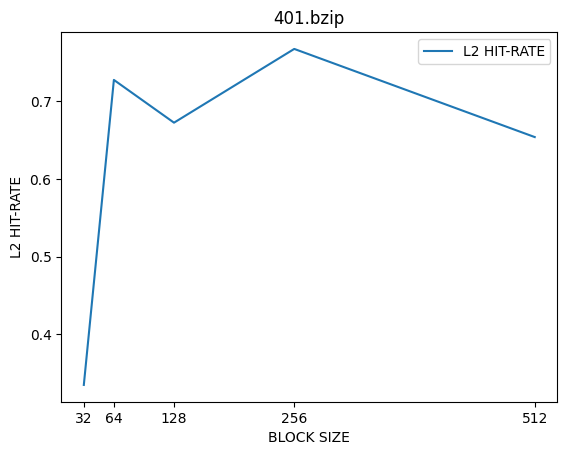

In [147]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [148]:
bench_mark = '429.mcf'
test_param = 'BLOCK SIZE'
ouput1 = 'L2 HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,L2 HIT-RATE
0,BLOCK SIZE,32,0.180860
1,BLOCK SIZE,64,0.224366
2,BLOCK SIZE,128,0.263860
3,BLOCK SIZE,256,0.274702
4,BLOCK SIZE,512,0.219762


<Figure size 200x100 with 0 Axes>

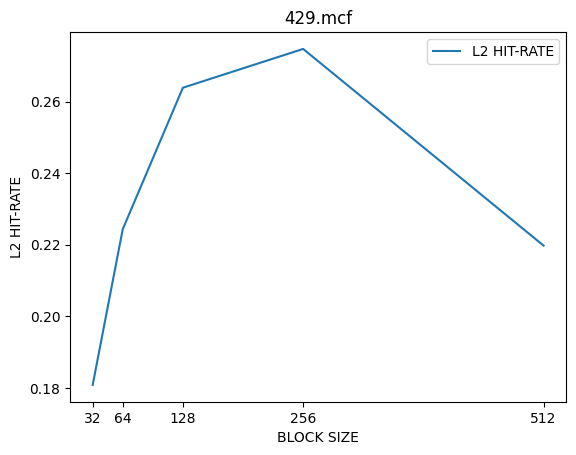

In [149]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [150]:
bench_mark = '458.sjeng'
test_param = 'BLOCK SIZE'
ouput1 = 'L2 HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,L2 HIT-RATE
0,BLOCK SIZE,32,0.028978
1,BLOCK SIZE,64,0.083196
2,BLOCK SIZE,128,0.151400
3,BLOCK SIZE,256,0.200930
4,BLOCK SIZE,512,0.211304


<Figure size 200x100 with 0 Axes>

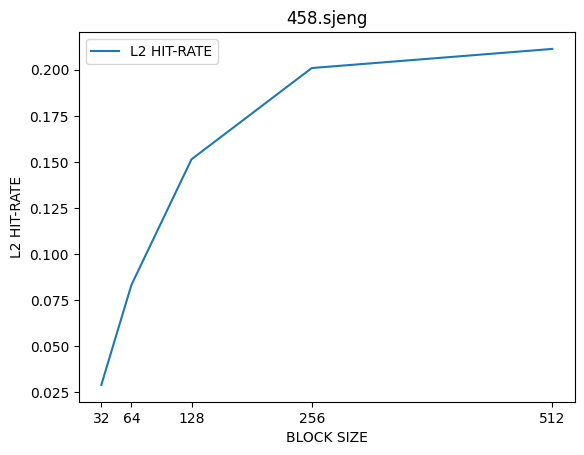

In [151]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [152]:
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,BLOCK SIZE,L2 HIT-RATE
0,401.bzip,32,0.335016
1,401.bzip,64,0.727185
2,401.bzip,128,0.672193
3,401.bzip,256,0.767026
4,401.bzip,512,0.653692
5,429.mcf,32,0.180860
6,429.mcf,64,0.224366
7,429.mcf,128,0.263860
8,429.mcf,256,0.274702
9,429.mcf,512,0.219762


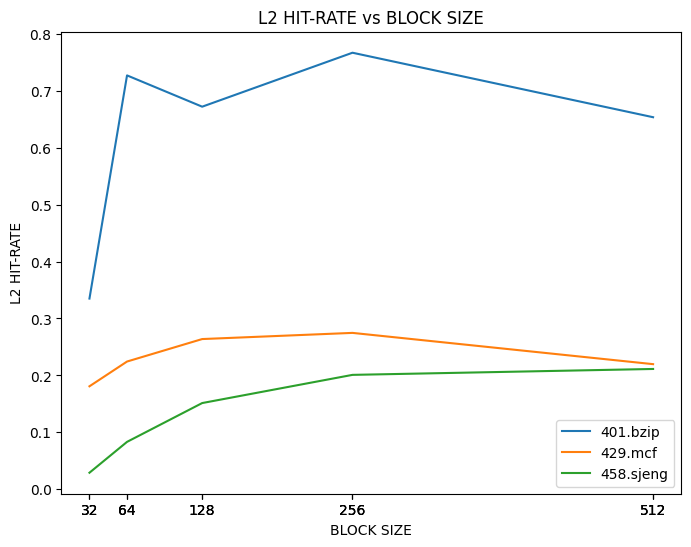

In [153]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

# 'BLOCK SIZE', L1-D HIT-RATE

In [154]:
bench_mark = '401.bzip'
test_param = 'BLOCK SIZE'
ouput1 = 'L1-D HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,L1-D HIT-RATE
0,BLOCK SIZE,32,0.939055
1,BLOCK SIZE,64,0.727234
2,BLOCK SIZE,128,0.696008
3,BLOCK SIZE,256,0.728351
4,BLOCK SIZE,512,0.629499


<Figure size 200x100 with 0 Axes>

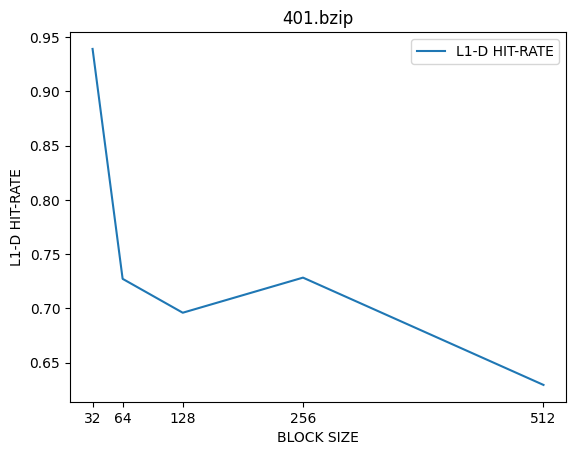

In [155]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [156]:
bench_mark = '429.mcf'
test_param = 'BLOCK SIZE'
ouput1 = 'L1-D HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,L1-D HIT-RATE
0,BLOCK SIZE,32,0.817319
1,BLOCK SIZE,64,0.811932
2,BLOCK SIZE,128,0.783601
3,BLOCK SIZE,256,0.744790
4,BLOCK SIZE,512,0.965658


<Figure size 200x100 with 0 Axes>

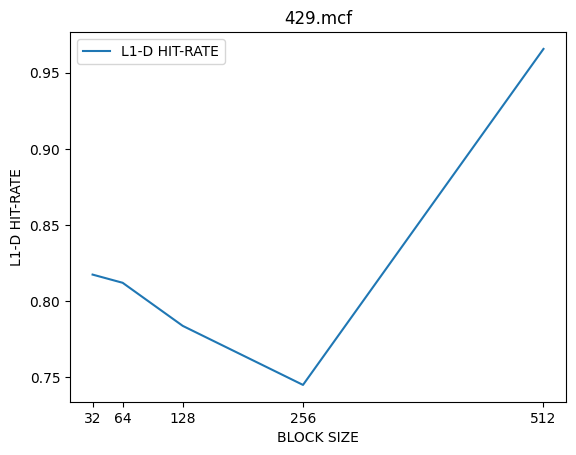

In [157]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [158]:
bench_mark = '458.sjeng'
test_param = 'BLOCK SIZE'
ouput1 = 'L1-D HIT-RATE'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,L1-D HIT-RATE
0,BLOCK SIZE,32,0.781553
1,BLOCK SIZE,64,0.869264
2,BLOCK SIZE,128,0.902417
3,BLOCK SIZE,256,0.901067
4,BLOCK SIZE,512,0.877272


<Figure size 200x100 with 0 Axes>

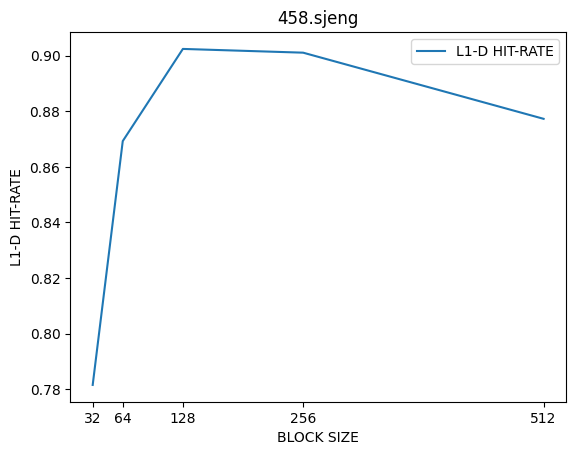

In [159]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [160]:
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,BLOCK SIZE,L1-D HIT-RATE
0,401.bzip,32,0.939055
1,401.bzip,64,0.727234
2,401.bzip,128,0.696008
3,401.bzip,256,0.728351
4,401.bzip,512,0.629499
5,429.mcf,32,0.817319
6,429.mcf,64,0.811932
7,429.mcf,128,0.783601
8,429.mcf,256,0.744790
9,429.mcf,512,0.965658


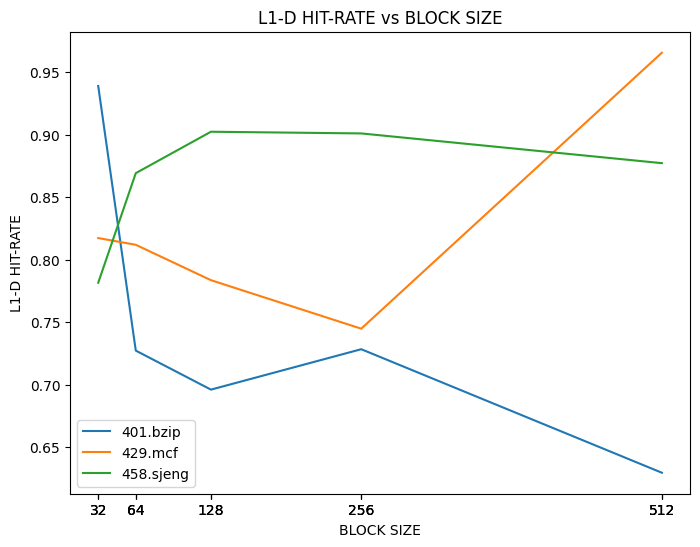

In [161]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

# 'BLOCK SIZE', CPI

In [162]:
bench_mark = '401.bzip'
test_param = 'BLOCK SIZE'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,CPI
0,BLOCK SIZE,32,2.936596
1,BLOCK SIZE,64,4.835013
2,BLOCK SIZE,128,5.859129
3,BLOCK SIZE,256,4.407183
4,BLOCK SIZE,512,7.116593


<Figure size 200x100 with 0 Axes>

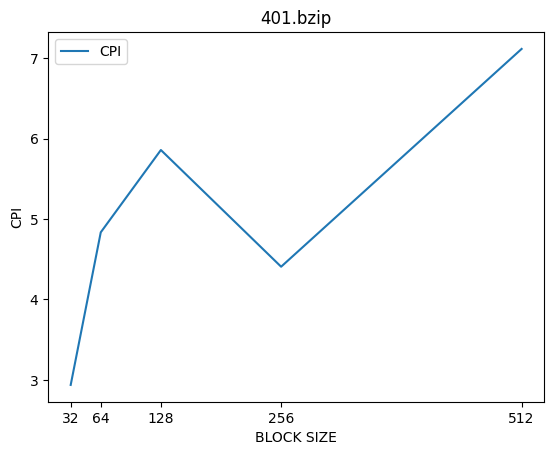

In [163]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [164]:
bench_mark = '429.mcf'
test_param = 'BLOCK SIZE'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,CPI
0,BLOCK SIZE,32,12.178820
1,BLOCK SIZE,64,9.201452
2,BLOCK SIZE,128,7.808054
3,BLOCK SIZE,256,7.699568
4,BLOCK SIZE,512,8.988029


<Figure size 200x100 with 0 Axes>

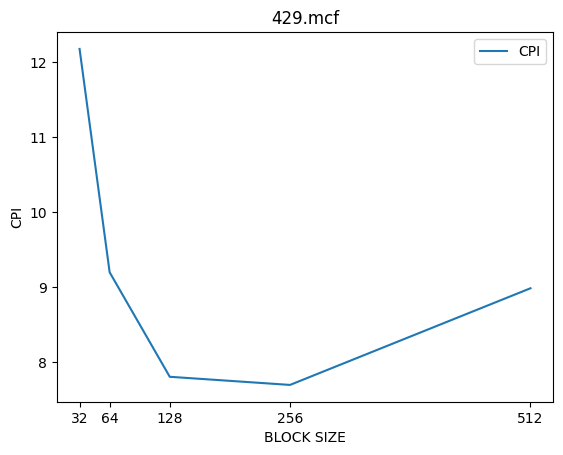

In [165]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [166]:
bench_mark = '458.sjeng'
test_param = 'BLOCK SIZE'
ouput1 = 'CPI'
cols = ['Test Parameter',test_param,ouput1]

res = df[(df['Test Parameter'] == test_param) & (df['Test Bench Mark'] == bench_mark)][cols]
res = res.reset_index(drop=True)
res

,Test Parameter,BLOCK SIZE,CPI
0,BLOCK SIZE,32,10.241443
1,BLOCK SIZE,64,6.256306
2,BLOCK SIZE,128,4.665294
3,BLOCK SIZE,256,4.525464
4,BLOCK SIZE,512,5.323540


<Figure size 200x100 with 0 Axes>

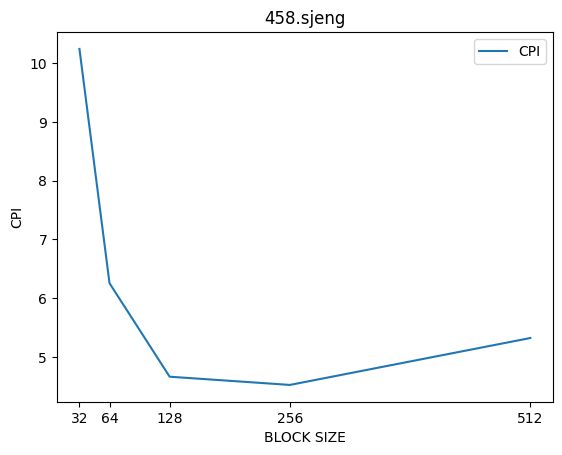

In [167]:
plt.figure(figsize=(2,1))
res.plot(x = test_param,y = ouput1)
plt.xlabel(test_param)
plt.xticks(res[test_param])

plt.ylabel(ouput1)
plt.title(bench_mark)
plt.show()

In [168]:
cols = ['Test Bench Mark',test_param,ouput1]
res = df[df['Test Parameter'] == test_param][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,BLOCK SIZE,CPI
0,401.bzip,32,2.936596
1,401.bzip,64,4.835013
2,401.bzip,128,5.859129
3,401.bzip,256,4.407183
4,401.bzip,512,7.116593
5,429.mcf,32,12.178820
6,429.mcf,64,9.201452
7,429.mcf,128,7.808054
8,429.mcf,256,7.699568
9,429.mcf,512,8.988029


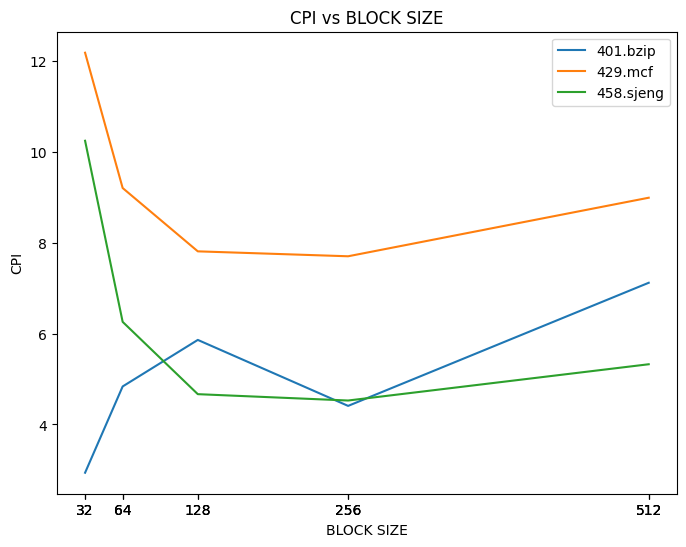

In [169]:
benchmarks = df['Test Bench Mark'].unique()
fig, ax = plt.subplots(figsize=(8, 6))
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    ax.plot(data[test_param], data[ouput1], label=benchmark)
ax.set_xlabel(test_param)
ax.set_ylabel(ouput1)
ax.set_xticks(res[test_param])
ax.set_title('{} vs {}'.format(ouput1,test_param))
ax.legend()
plt.show()

In [ ]:
a0 = df[df['Test Parameter'] == 'L1-I SIZE'][['Test Bench Mark','L1-I SIZE','L1-I HIT-RATE']]
a0 = a0.reset_index(drop=True)

In [ ]:
grouped = a0.groupby('Test Bench Mark')

fig, ax = plt.subplots()
for name, group in grouped:
    ax.plot(group['L1-I SIZE'], group['L1-I HIT-RATE'], label=name)
ax.set_xlabel('L1-I SIZE')
ax.set_ylabel('L1-I HIT-RATE')
ax.legend()
plt.show()

In [ ]:
a0 = df[df['Test Parameter'] == 'L2 SIZE'][['Test Bench Mark','L2 SIZE','L2 HIT-RATE']]
a0 = a0.reset_index(drop=True)

In [ ]:
grouped = a0.groupby('Test Bench Mark')

fig, ax = plt.subplots()
for name, group in grouped:
    ax.plot(group['L2 SIZE'], group['L2 HIT-RATE'], label=name)
ax.set_xlabel('L2 SIZE')
ax.set_ylabel('L2 HIT-RATE')
ax.legend()
plt.show()